# Lab 2 - Classification

Nama: Istifa Shania

NIM: 23523007

## Dataset
Link dataset: 
Deskripsi dari dataset:
- First Name : Nama depan 
- Last Name : Nama belakang
- Birthday : Tanggal lahir
- Species : Jenis spesies (manusia atau bukan)
- Blood Status : Status darah penyihir (darah murni, darah campuran, darah non-penyihir)
- Best Hand : Tangan terbaik saat menggunakan tongkat sihir (kanan atau kiri)
- Arithmancy : Kemahiran dalam mempelajari sihir yang berhubungan dengan angka  
- Astronomy : Kemahiran dalam mempelajari sihir yang berhubungan dengan fenomena angkasa 
- Herbology : Kemahiran dalam mempelajari tumbuhan dan jamur di dunia sihir
- Defense Against the Dark Arts : Kemahiran dalam ilmu pertahanan diri dari sihir yang gelap
- Divination : Kemahiran dalam menerawang masa depan
- Muggle Studies : Kemahiran dalam mempelajari dunia dan sejarah muggle (non-penyihir)
- Ancient Runes : Kemahiran dalam mempelajari artefak sihir kuno
- History of Magic : Kemahiran dalam ilmu sejarah di dunia sihir
- Transfiguration : Kemahiran dalam ilmu perubahan bentuk menjadi sebuah benda, hewan, atau orang lain
- Potions : Kemahiran dalam membuat ramuan sihir
- Care of Magical Creatures : Kemahiran dalam komunikasi dan pemeliharaan hewan sihir
- Charms : Kemahiran dalam menguasai matra sihir
- Flying : Kemahiran dalam terbang menggunakan sapu terbang
- Hogwarts House : Asrama Hogwarts (Gryffindor, Ravenclaw, Hufflepuff, Slytherin)

## Import libraries and dataset

In [1]:
# Import libraries
import joblib
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
x_latih = pd.read_csv('/kaggle/input/if517101-modul-2-klasifikasi/x_train.csv')
y_latih =  pd.read_csv('/kaggle/input/if517101-modul-2-klasifikasi/y_train.csv')
x_val = pd.read_csv('/kaggle/input/if517101-modul-2-klasifikasi/x_validate.csv')
y_val = pd.read_csv('/kaggle/input/if517101-modul-2-klasifikasi/y_validate.csv')
x_uji = pd.read_csv('/kaggle/input/if517101-modul-2-klasifikasi/x_test.csv')
x_comp = x_latih.join(y_latih)
x_comp

,First Name,Last Name,Birthday,Species,Blood Status,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,House
0,Lorna,Graves,2000-03-28,Human,Pure Blood,Left,71.864900,4.110278,7.229907,70.801332,4.182763,0.364469,2.148078,49.956951,19.132938,13.123478,45.667927,32.392948,13.806618,Slytherin
1,Rudolf,Childs,1997-11-25,Human,Pure Blood,Left,99.507072,18.928583,32.056387,5.682743,2.829717,0.442748,NaN,36.908021,12.428255,99.790793,67.814478,47.704101,39.883615,Gryffindor
2,Selina,Mccune,2001-08-17,Human,Half Blood,Left,54.992809,18.792944,4.149932,22.180558,3.045631,0.907479,37.485514,12.474482,11.052692,6.889890,55.768311,8.670640,18.831155,Hufflepuff
3,Earle,Branson,1997-12-29,Human,Half Blood,Left,62.608447,7.215338,34.951626,17.553261,3.928367,0.680672,14.083917,75.705431,1.864171,12.640418,43.712479,60.746181,15.827073,Ravenclaw
4,Tracie,Sturgeon,2001-03-28,Human,Pure Blood,Right,51.557305,9.500778,27.557312,79.759675,4.542559,0.151740,10.918093,66.517545,10.998838,17.016210,45.666188,70.829111,10.600599,Slytherin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,Lorna,Metzler,1997-11-24,Human,Pure Blood,Left,67.315157,18.946705,8.150471,15.133536,0.255047,0.201176,19.428234,48.191744,4.745998,10.744286,38.819768,16.904711,15.642507,Hufflepuff
746,Sammie,Zimmerman,2001-09-30,Werewolf,Half Blood,Right,52.521535,4.500041,19.124358,NaN,0.542054,0.560615,19.904610,74.674729,14.471406,16.289617,59.076540,23.158266,11.620055,Slytherin
747,Sunny,Hadley,1998-09-24,Human,Half Blood,Right,50.316255,NaN,17.981266,33.613810,4.764172,0.335701,4.515237,18.429482,2.711447,7.887857,49.098758,23.691784,43.066835,Gryffindor
748,Alana,Kersey,1998-01-03,Human,Pure Blood,Left,92.688550,7.319343,3.525477,27.050675,3.064530,0.253095,38.945828,30.363082,4.006290,97.817280,56.756892,44.853591,24.431103,Hufflepuff


## EDA (Exploratory Data Analysis)

### Descriptive Analysis
Analisis dataset secara deskriptif untuk mendapatkan gambaran singkat terkait dataset seperti jumlah kolom dan baris, tipe data, jumlah null values pada dataset, dan lain-lain. Analisis dapat menggunakan beberapa fungsi seperti 
- `df.info()` 
- `df.describe()`
- `df.duplicated`
- dst.


In [3]:
# mengambil semua nama kolom dari dataset latih
x_comp.columns

Index(['First Name', 'Last Name', 'Birthday', 'Species', 'Blood Status',
       'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology',
       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying', 'House'],
      dtype='object')

In [4]:
# tipe data dari dataset training (x_comp)
x_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   First Name                     750 non-null    object 
 1   Last Name                      750 non-null    object 
 2   Birthday                       750 non-null    object 
 3   Species                        750 non-null    object 
 4   Blood Status                   750 non-null    object 
 5   Best Hand                      750 non-null    object 
 6   Arithmancy                     740 non-null    float64
 7   Astronomy                      747 non-null    float64
 8   Herbology                      741 non-null    float64
 9   Defense Against the Dark Arts  740 non-null    float64
 10  Divination                     747 non-null    float64
 11  Muggle Studies                 748 non-null    float64
 12  Ancient Runes                  746 non-null    flo

In [5]:
# deskripsi stastistika dari dataset latih
x_comp.describe()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,740.000000,747.000000,741.000000,740.000000,747.000000,748.000000,746.000000,746.000000,741.000000,744.000000,748.000000,743.000000,750.000000
mean,71.664166,10.109807,20.056835,33.473444,2.406754,0.630984,19.979781,43.752234,10.030153,44.037082,51.198636,41.173826,22.546806
std,21.116292,5.822681,11.060622,24.644382,1.468923,0.260078,11.368680,24.175414,5.869990,41.165968,15.043452,23.757428,10.708875
min,8.094273,0.024997,0.002112,0.036267,0.004158,0.001206,0.051494,0.000000,0.002903,2.104433,5.659518,0.071751,0.000000
25%,54.596524,4.853462,11.486113,16.718236,1.125453,0.420149,10.296691,20.782676,4.929953,10.293103,41.508800,21.090728,15.644949
50%,68.502853,10.216517,19.739419,26.909037,2.333651,0.710823,19.642168,49.245950,10.014430,14.575508,51.163321,40.432883,19.631845
75%,93.867889,15.096216,29.337988,38.429973,3.642077,0.841963,29.573731,64.772008,15.336881,94.036642,61.072096,63.129476,25.520313
max,99.924923,19.989258,39.833888,93.329885,4.997587,0.999597,39.873752,100.000000,19.956164,99.987874,100.000000,79.972928,49.636297


In [6]:
# Melihat kolom dengan null value
check_null = pd.isnull(x_comp).sum()
print(check_null)

First Name                        0
Last Name                         0
Birthday                          0
Species                           0
Blood Status                      0
Best Hand                         0
Arithmancy                       10
Astronomy                         3
Herbology                         9
Defense Against the Dark Arts    10
Divination                        3
Muggle Studies                    2
Ancient Runes                     4
History of Magic                  4
Transfiguration                   9
Potions                           6
Care of Magical Creatures         2
Charms                            7
Flying                            0
House                             0
dtype: int64


In [7]:
# Melihat kolom dengan null value x_uji
check_null = pd.isnull(x_uji).sum()
print(check_null)

ID                               0
First Name                       0
Last Name                        0
Birthday                         0
Species                          0
Blood Status                     0
Best Hand                        0
Arithmancy                       0
Astronomy                        0
Herbology                        0
Defense Against the Dark Arts    0
Divination                       0
Muggle Studies                   0
Ancient Runes                    0
History of Magic                 0
Transfiguration                  0
Potions                          0
Care of Magical Creatures        0
Charms                           0
Flying                           0
dtype: int64


In [8]:
# Menampilkan jika ada data yang duplikat
x_comp.duplicated().any()

False

In [9]:
#  Cek variasi value fitur tipe kategorikal (species, blood status, best hand, house)
nilai_unik_species = x_comp['Species'].drop_duplicates()
nilai_unik_blood = x_comp['Blood Status'].drop_duplicates()
nilai_unik_hand = x_comp['Best Hand'].drop_duplicates()
nilai_unik_house = x_comp['House'].drop_duplicates()

print("species= ", nilai_unik_species.values.tolist())
print("Blood Status= ", nilai_unik_blood.values.tolist())
print("Best Hand= ", nilai_unik_hand.values.tolist())
print("House= ", nilai_unik_house.values.tolist())

species=  ['Human', 'Werewolf', 'Half Giant']
Blood Status=  ['Pure Blood', 'Half Blood', 'Muggle']
Best Hand=  ['Left', 'Right']
House=  ['Slytherin', 'Gryffindor', 'Hufflepuff', 'Ravenclaw']


In [10]:
# Substitusi value domain kategorikal ke numerikal
x_comp['Species'] = x_comp['Species'].replace({'Human':1,'Werewolf':2,'Half Giant':3})
x_comp['Blood Status'] = x_comp['Blood Status'].replace({'Pure Blood':1, 'Half Blood':2, 'Muggle':3})
x_comp['Best Hand'] = x_comp['Best Hand'].replace({'Left':1, 'Right':2})
x_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   First Name                     750 non-null    object 
 1   Last Name                      750 non-null    object 
 2   Birthday                       750 non-null    object 
 3   Species                        750 non-null    int64  
 4   Blood Status                   750 non-null    int64  
 5   Best Hand                      750 non-null    int64  
 6   Arithmancy                     740 non-null    float64
 7   Astronomy                      747 non-null    float64
 8   Herbology                      741 non-null    float64
 9   Defense Against the Dark Arts  740 non-null    float64
 10  Divination                     747 non-null    float64
 11  Muggle Studies                 748 non-null    float64
 12  Ancient Runes                  746 non-null    flo

In [11]:
# convert target ke int untuk viz heatmap dan slicing kolom numerikal fitur saja
x_comp_heat = x_comp
x_comp_heat['House'] = x_comp['House'].replace({'Slytherin':1, 'Gryffindor':2,'Hufflepuff':3,'Ravenclaw':4})

x_comp_heat = x_comp_heat.iloc[:,3:20]

### Visualization
Berikan contoh minimal 3 (tiga) visualisasi hasil eksplorasi dataset dan berikan penjelasan singkat untuk setiap visualisasi.

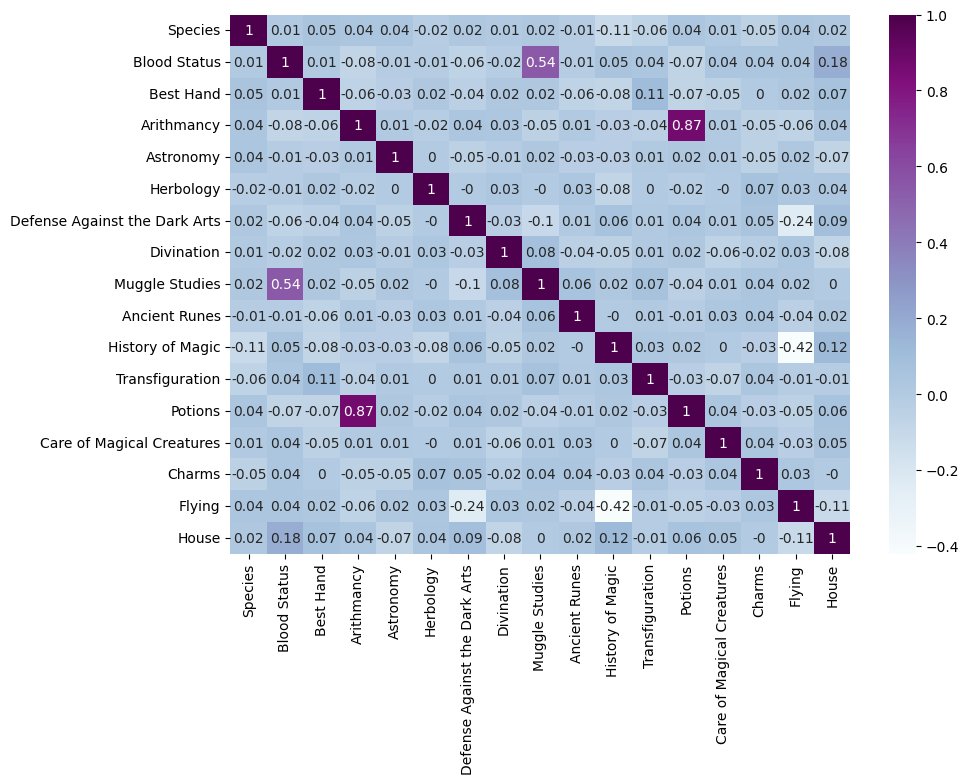

In [12]:
# Visualisasi 1: Melihat korelasi setiap variabel
plt.figure(figsize=(10, 7))
sns.heatmap(round(x_comp_heat.corr(),2), annot = True, cmap="BuPu")
plt.show()

**Interpretasi:** Heatmap dari nilai korelasi antar variabel menunjukkan Blood Status merupakan fitur yang memberikan nilai korelasi paling tinggi diantara variabel independent lainnya.

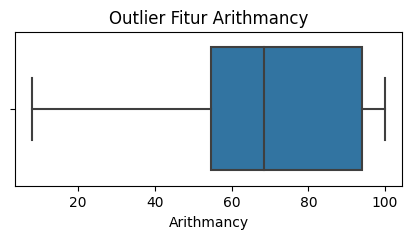

In [13]:
# Visualisasi 2: Membuat boxplot untuk fitur numerikal ('Arithmancy')
plt.figure(figsize=(5, 2))
sns.boxplot(x=x_comp['Arithmancy'])
plt.title('Outlier Fitur Arithmancy')
plt.show()

**Interpretasi:** Untuk fitur arithmancy terlihat tidak ada outliers.

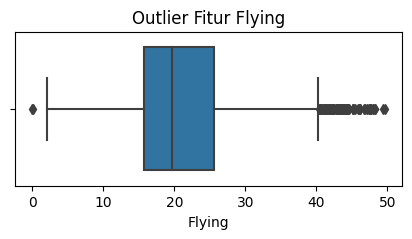

In [14]:
# Visualisasi 2: Cek outlier fitur flying
plt.figure(figsize=(5, 2))
sns.boxplot(x=x_comp['Flying'])
plt.title('Outlier Fitur Flying')
plt.show()

**Interpretasi**: Untuk fitur flying terlihat **ada outliers**. Dikarenakan fitur ini menggambarkan kemahiran murid dalam menggunakan sapu terbang (ability), diasumsikan outliers pada kasus ini sebagai nilai ekstrim mewakili kemahiran murid. Outliers pada kasus ini tidak dilihat sebagai kesalahan pengisian, sehingga dirasa tidak perlu dilakukan handling outliers berupa remove instances yang outliers.

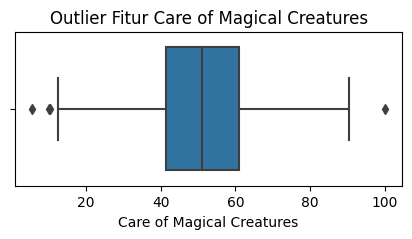

In [15]:
# Visualisasi 2: Outlier fitur Care of Magical Creatures
plt.figure(figsize=(5, 2))
sns.boxplot(x=x_comp['Care of Magical Creatures'])
plt.title('Outlier Fitur Care of Magical Creatures')
plt.show()

**Interpretasi**: Untuk fitur Care of Magical Creatures terlihat **ada outliers**. Sama seperti fitur flying, fitur ini menggambarkan kemahiran murid dalam berkomunikasi dengan hewan gaib. Sehingga outliers dipandang sebagai nilai ekstrims kemahiran murid, tidak dipandang sebagai kesalahan yang tidak disengaja.

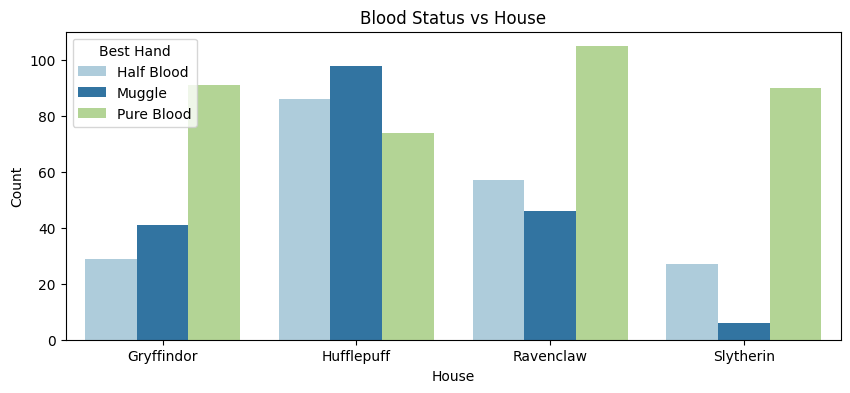

In [16]:
# Visualisasi 3: check value apa yang paling dominan dari fitur Blood Status untuk target house
awal = x_latih.join(y_latih)
count_data = awal.groupby(['Blood Status', 'House']).size().reset_index(name='Count')


plt.figure(figsize=(10, 4))
sns.barplot(data=count_data, x='House', y='Count', hue='Blood Status', palette='Paired')
plt.xlabel('House')
plt.ylabel('Count')
plt.title('Blood Status vs House')
plt.legend(title='Best Hand', loc='upper left')
plt.show()

**Interpretasi:** Grouped bar chart diatas mengindikasikan murid dengan blood status pure blood merupakan golongan yang paling banyak mendominasi di setiap house. 

## Data Preprocessing
Tahap ini dilakukan untuk mempersiapkan data sebelum nantinya menjadi input ke dalam model. Beberapa hal yang dapat dilakukan:
- Handle missing / nan values
- Handle categorical data
- Handle imbalance data
- Feature selection
- dst.

In [17]:
# Handling missing value dengan fill mean
handel_1 = x_comp_heat.fillna(x_comp_heat.mean())
check_null = pd.isnull(handel_1).sum()
print(check_null)

Species                          0
Blood Status                     0
Best Hand                        0
Arithmancy                       0
Astronomy                        0
Herbology                        0
Defense Against the Dark Arts    0
Divination                       0
Muggle Studies                   0
Ancient Runes                    0
History of Magic                 0
Transfiguration                  0
Potions                          0
Care of Magical Creatures        0
Charms                           0
Flying                           0
House                            0
dtype: int64


**Handling categorical data yakni mengganti values string pada fitur domain kategorikal menjadi values numerical (sudah dilakukan pada tahap sebelumnya untuk membuat heatmap nilai korelasi antar fitur).** 

In [18]:
# check imbalance data
spare = x_latih.join(y_latih)
spare['House'].value_counts()

House
Hufflepuff    258
Ravenclaw     208
Gryffindor    161
Slytherin     123
Name: count, dtype: int64

**Interpretasi:** kelas hufflepuff merupakan kelas yang paling mendominan dalam data latih, sehingga dilakukan handling imblanced berupa undersampling untuk kelas hufflepuff, ravenclaw, gryffindor. Semua kelas diambil sebanyak 123 instances.

In [19]:
# Data validasi preparasi (convert predicktor menjadi numerikal, target tetap object, nama ultah belum di drop)
# Joinkan data
df_val = x_val.join(y_val)

# replace kategorikal dengan numerikal
df_val['Species'] = df_val['Species'].replace({'Human':1,'Werewolf':2,'Half Giant':3})
df_val['Blood Status'] = df_val['Blood Status'].replace({'Pure Blood':1, 'Half Blood':2, 'Muggle':3})
df_val['Best Hand'] = df_val['Best Hand'].replace({'Left':1, 'Right':2})
#df_val['House'] = df_val['House'].replace({'Slytherin':1, 'Gryffindor':2,'Hufflepuff':3,'Ravenclaw':4})
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   First Name                     250 non-null    object 
 1   Last Name                      250 non-null    object 
 2   Birthday                       250 non-null    object 
 3   Species                        250 non-null    int64  
 4   Blood Status                   250 non-null    int64  
 5   Best Hand                      250 non-null    int64  
 6   Arithmancy                     250 non-null    float64
 7   Astronomy                      250 non-null    float64
 8   Herbology                      250 non-null    float64
 9   Defense Against the Dark Arts  250 non-null    float64
 10  Divination                     250 non-null    float64
 11  Muggle Studies                 250 non-null    float64
 12  Ancient Runes                  250 non-null    flo

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

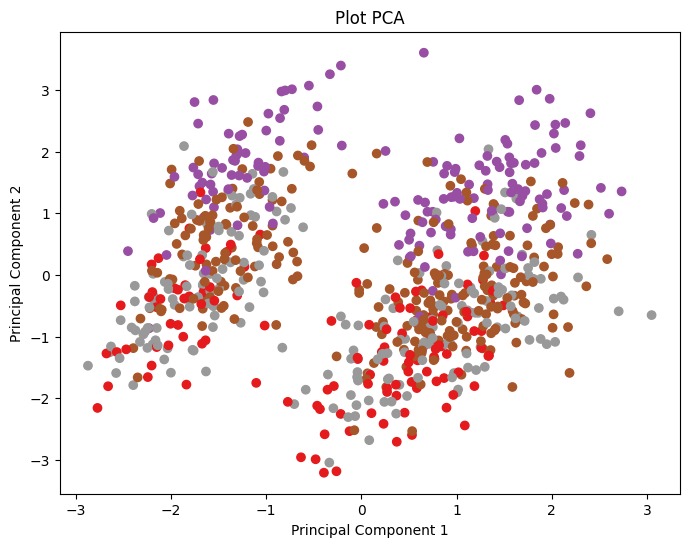

In [21]:
# Feature selection dengan cara reduksi dimensi

# Splitting data
X_train, X_test, y_train, y_test = handel_1.drop(['House'],axis=1), df_val.drop(['House','First Name', 'Last Name', 'Birthday'], axis=1), handel_1['House'], df_val['House']

# Normalisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.title('Plot PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Modeling


### Decision Tree

In [22]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.metrics import classification_report
from sklearn import metrics

In [23]:
# tentukan mana yg prediktor dan target
xlatih, xval, ylatih, yval = handel_1.drop(['House'],axis=1), df_val.drop(['House','First Name', 'Last Name', 'Birthday'], axis=1), handel_1['House'], df_val['House']

In [24]:
# Normalisasi
latih_norm = scaler.fit_transform(xlatih)
val_norm = scaler.transform(xval)

In [25]:
print('ukuran datalatih X: {} '.format(xlatih.shape), '&','ukuran datalatih y: {}'.format(ylatih.shape))

ukuran datalatih X: (750, 16)  & ukuran datalatih y: (750,)


In [26]:
print('ukuran datalatih X: {} '.format(xval.shape), '&','ukuran datalatih y: {}'.format(yval.shape))

ukuran datalatih X: (250, 16)  & ukuran datalatih y: (250,)


In [27]:
# Model 1 setting criterion menjadi gini index.
# Model
potterTree_Gini = DecisionTreeClassifier(criterion="gini", max_depth =7)
potterTree_Gini
potterTree_Gini.fit(xlatih,y_latih)

# Prediction
predTree_Gini = potterTree_Gini.predict(xval)

# Evaluasi
print(classification_report(yval,predTree_Gini))
print("DecisionTrees's Accuracy Gini: ", metrics.accuracy_score(yval, predTree_Gini))

              precision    recall  f1-score   support

  Gryffindor       0.98      0.96      0.97        48
  Hufflepuff       0.78      0.67      0.72        79
   Ravenclaw       0.61      0.69      0.64        70
   Slytherin       0.71      0.75      0.73        53

    accuracy                           0.75       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.76      0.75      0.75       250

DecisionTrees's Accuracy Gini:  0.748


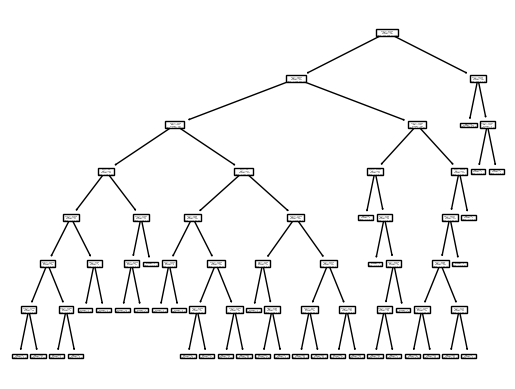

<Figure size 1500x600 with 0 Axes>

In [28]:
tree.plot_tree(potterTree_Gini)
plt.figure(figsize=(15, 6))
plt.show()

In [29]:
#  Model 2 setting criterion menjadi gini entropy
# Model
potterTree_Entro = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
potterTree_Entro
potterTree_Entro.fit(xlatih,y_latih)

# Prediction
predTree_Entro = potterTree_Entro.predict(xval)

# Evaluasi
print(classification_report(yval,predTree_Entro))
print("DecisionTrees's Accuracy Entro: ", metrics.accuracy_score(yval, predTree_Entro))

              precision    recall  f1-score   support

  Gryffindor       0.98      0.98      0.98        48
  Hufflepuff       0.69      0.82      0.75        79
   Ravenclaw       0.73      0.59      0.65        70
   Slytherin       0.77      0.75      0.76        53

    accuracy                           0.77       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.77      0.77      0.77       250

DecisionTrees's Accuracy Entro:  0.772


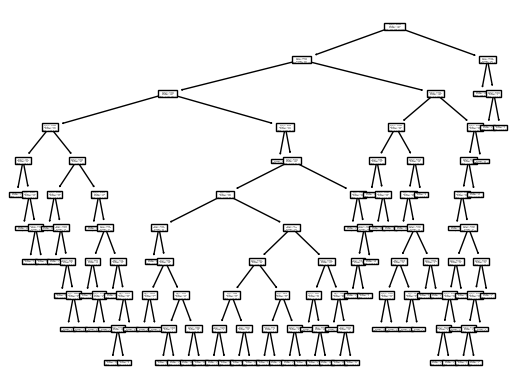

<Figure size 1500x600 with 0 Axes>

In [30]:
tree.plot_tree(potterTree_Entro)
plt.figure(figsize=(15, 6))
plt.show()

**Analisa:**

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

In [32]:
# Model 1 tidak dilakukan tunning (model default)
LR = LogisticRegression(solver='lbfgs', max_iter=1000).fit(latih_norm ,ylatih)
LR

# prediksi menggunakan xvalidasi
yhat = LR.predict(val_norm)
yhat

# Prediksi probabilitas kelas target
yhat_prob = LR.predict_proba(val_norm)
yhat_prob

# Evaluasi
yval_lr =  y_val['House'].replace({'Slytherin':1, 'Gryffindor':2,'Hufflepuff':3,'Ravenclaw':4})
print (classification_report(yval_lr, yhat))

print("log loss tanpa tunning: ", log_loss(yval_lr, yhat_prob))

              precision    recall  f1-score   support

           1       0.73      0.70      0.71        53
           2       0.90      0.98      0.94        48
           3       0.60      0.70      0.65        79
           4       0.62      0.50      0.56        70

    accuracy                           0.70       250
   macro avg       0.71      0.72      0.71       250
weighted avg       0.69      0.70      0.69       250

log loss tanpa tunning:  0.6603129537615097


In [33]:
# Model 2 dilakukan dengan tunning metode gridsearch cv

import warnings
# Mengabaikan semua peringatan
warnings.filterwarnings("ignore")

# Buat objek model Regresi Logistik
LogR = LogisticRegression()

# parameter grid search dan nilai-nilai yang ingin diuji
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'C': [0.01, 0.1, 1, 10],
    'penalty': [None, 'l1', 'l2', 'elasticnet']
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=LogR, param_grid=param_grid, cv=5, scoring='accuracy')

# grid search pada data latih
grid_search.fit(latih_norm, ylatih)

# Tampilkan parameter terbaik dan skor terbaik
print("Parameter terbaik:", grid_search.best_params_)
print("Skor terbaik:", grid_search.best_score_)

# Model dengan parameter terbaik
best_LR = grid_search.best_estimator_

# Gunakan model terbaik untuk prediksi
yhat_grd =best_LR.predict(val_norm)
yhat_grd
yhat_prob_grd = best_LR.predict_proba(val_norm)

# Evaluasi
print (classification_report(yval_lr, yhat_grd))
print("log loss dengan tunning gridsearch cv: ", log_loss(yval_lr, yhat_prob_grd))


Parameter terbaik: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Skor terbaik: 0.7453333333333333
              precision    recall  f1-score   support

           1       0.78      0.68      0.73        53
           2       0.98      0.98      0.98        48
           3       0.61      0.82      0.70        79
           4       0.66      0.47      0.55        70

    accuracy                           0.72       250
   macro avg       0.76      0.74      0.74       250
weighted avg       0.73      0.72      0.72       250

log loss dengan tunning gridsearch cv:  0.6612074779875953


**Analisa:**

### SVM (Support Vector Machine)

In [34]:
# Model 1 SVM tanpa tunning
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(latih_norm, ylatih) 
yhat_svm = clf.predict(val_norm)

# Evaluasi
print (classification_report(yval_lr, yhat_svm))

              precision    recall  f1-score   support

           1       0.82      0.53      0.64        53
           2       0.98      0.96      0.97        48
           3       0.62      0.92      0.74        79
           4       0.67      0.50      0.57        70

    accuracy                           0.73       250
   macro avg       0.77      0.73      0.73       250
weighted avg       0.75      0.73      0.72       250



In [35]:
# Model 2 SVM dengan tunning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10],
}

svm = SVC()
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search.fit(latih_norm, ylatih)
print("Parameter terbaik:", grid_search.best_params_)
print("Skor terbaik:", grid_search.best_score_)

best_svm = grid_search.best_estimator_
yhat_svm = best_svm.predict(val_norm)

# Evaluasi
print (classification_report(yval_lr, yhat_svm))

Parameter terbaik: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Skor terbaik: 0.7453333333333333
              precision    recall  f1-score   support

           1       0.78      0.68      0.73        53
           2       0.98      0.98      0.98        48
           3       0.61      0.82      0.70        79
           4       0.66      0.47      0.55        70

    accuracy                           0.72       250
   macro avg       0.76      0.74      0.74       250
weighted avg       0.73      0.72      0.72       250



**Analisa:**

### Random Forest

In [36]:
# Model 1 tanpa tunning
from sklearn.ensemble import RandomForestClassifier
# Membuat model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model pada data pelatihan
rf_classifier.fit(latih_norm, ylatih)

# Melakukan prediksi pada data uji
y_pred_rf = rf_classifier.predict(val_norm)

# Evaluasi
print (classification_report(yval_lr, y_pred_rf ))

              precision    recall  f1-score   support

           1       0.85      0.74      0.79        53
           2       0.98      1.00      0.99        48
           3       0.70      0.87      0.78        79
           4       0.73      0.59      0.65        70

    accuracy                           0.79       250
   macro avg       0.81      0.80      0.80       250
weighted avg       0.79      0.79      0.78       250



In [37]:
# Model 2 dengan tunning gridsearch
rf_classifier = RandomForestClassifier(random_state=42)

# Menentukan daftar parameter yang akan diuji dalam Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Melatih model dengan Grid Search
grid_search.fit(latih_norm, ylatih)

# Mendapatkan model terbaik dari Grid Search
best_rf = grid_search.best_estimator_

# Melakukan prediksi pada data uji menggunakan model terbaik
y_pred_rf_terbaik = best_rf.predict(val_norm)

# Evaluasi
print (classification_report(yval_lr, y_pred_rf_terbaik ))

              precision    recall  f1-score   support

           1       0.86      0.70      0.77        53
           2       0.98      1.00      0.99        48
           3       0.67      0.87      0.76        79
           4       0.71      0.56      0.62        70

    accuracy                           0.77       250
   macro avg       0.80      0.78      0.79       250
weighted avg       0.78      0.77      0.77       250



**Analisa:**

### XGBoost

In [38]:
# Model 1 XGBoost tanpa tunnning
import xgboost as xgb


latx = handel_1.drop(['House'],axis=1)
laty = handel_1['House']
valx = df_val.drop(['House','First Name', 'Last Name', 'Birthday'], axis=1)
valy = yval_lr
y_transformed_lat = laty - 1
y_transformed_val = valy - 1
xgb_model = xgb.XGBClassifier()


In [39]:
# Latih model pada data pelatihan
xgb_model.fit(latx, y_transformed_lat)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [40]:
# Prediksi pada data pengujian
y_pred_xg = xgb_model.predict(valx)

In [41]:
# Mengukur akurasi
accuracy = accuracy_score(y_transformed_val, y_pred_xg)
print("Akurasi:", accuracy)

# Menampilkan classification report
classification_rep = classification_report(y_transformed_val, y_pred_xg)
print("Classification Report:\n", classification_rep)

Akurasi: 0.804
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79        53
           1       0.96      1.00      0.98        48
           2       0.76      0.82      0.79        79
           3       0.75      0.67      0.71        70

    accuracy                           0.80       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.80      0.80      0.80       250



In [42]:
# Model 2 XGBoost dengan tunning gridsearch
# Membuat objek XGBoostClassifier
xgb_model = xgb.XGBClassifier()

# Menentukan daftar parameter yang akan diuji dalam Grid Search
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Melatih model dengan Grid Search
grid_search.fit(latx, y_transformed_lat)

# Mendapatkan model terbaik dari Grid Search
best_xgb = grid_search.best_estimator_

# Melakukan prediksi pada data uji menggunakan model terbaik
y_pred_xgb = best_xgb.predict(valx)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_transformed_val, y_pred_xgb)
print("Akurasi:", accuracy)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Menampilkan classification report
classification_rep = classification_report(y_transformed_val, y_pred_xgb)
print("Classification Report:\n", classification_rep)

Akurasi: 0.812
Parameter terbaik: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        53
           1       0.98      1.00      0.99        48
           2       0.73      0.84      0.78        79
           3       0.78      0.66      0.71        70

    accuracy                           0.81       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.81      0.81      0.81       250



**Analisis:**

## Result (Leaderboards)
Gunakan model terbaik untuk memprediksi x_test. 
- Model terbaik bisa menggunakan model yang sudah dibuat sebelumnya atau membuat model baru.
- Dapat menggunakan skema preprocessing yang lain seperti normalisasi, feature selection, data imbalance, dan teknik lainnya.
- Tampilkan hasil classification report dan confusion matrix.
- Lakukan analisis berdasarkan classification report.
- Simpan hasil prediksi data uji dalam file `.csv` dan upload ke dalam submission di Kaggle Competition.

### Best model to predict x_test
Analisis model terbaik dan berikan alasan mengapa kinerja paling baik di antara model-model yang lain. 

In [43]:
# preparasi data uji
xt = x_uji.drop(['ID','First Name', 'Last Name', 'Birthday'], axis=1)
xt

# Substitusi value domain kategorikal ke numerikal
xt['Species'] = xt['Species'].replace({'Human':1,'Werewolf':2,'Half Giant':3})
xt['Blood Status'] = xt['Blood Status'].replace({'Pure Blood':1, 'Half Blood':2, 'Muggle':3})
xt['Best Hand'] = xt['Best Hand'].replace({'Left':1, 'Right':2})
xt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Species                        251 non-null    int64  
 1   Blood Status                   251 non-null    int64  
 2   Best Hand                      251 non-null    int64  
 3   Arithmancy                     251 non-null    float64
 4   Astronomy                      251 non-null    float64
 5   Herbology                      251 non-null    float64
 6   Defense Against the Dark Arts  251 non-null    float64
 7   Divination                     251 non-null    float64
 8   Muggle Studies                 251 non-null    float64
 9   Ancient Runes                  251 non-null    float64
 10  History of Magic               251 non-null    float64
 11  Transfiguration                251 non-null    float64
 12  Potions                        251 non-null    flo

In [44]:
# Melakukan prediksi pada data uji menggunakan model terbaik
y_pred_fin = best_xgb.predict(xt)
y_pred_fin

array([2, 3, 2, 0, 0, 3, 0, 3, 1, 2, 3, 3, 1, 0, 2, 3, 3, 3, 0, 3, 3, 0,
       3, 1, 2, 2, 1, 2, 1, 3, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 3, 3, 3, 2,
       1, 0, 3, 2, 3, 0, 1, 3, 1, 1, 3, 1, 2, 3, 3, 3, 1, 2, 3, 2, 0, 2,
       3, 3, 0, 0, 1, 2, 0, 0, 2, 3, 0, 3, 0, 3, 1, 3, 1, 2, 3, 3, 1, 3,
       3, 2, 0, 3, 2, 3, 2, 1, 0, 2, 0, 3, 2, 3, 1, 2, 3, 3, 1, 3, 3, 1,
       3, 2, 2, 3, 0, 0, 3, 3, 1, 1, 0, 0, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2,
       3, 1, 2, 1, 3, 3, 3, 2, 3, 2, 3, 1, 3, 2, 2, 3, 3, 1, 1, 0, 2, 2,
       2, 2, 2, 3, 3, 0, 3, 3, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1,
       3, 2, 3, 0, 2, 2, 3, 0, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2,
       0, 3, 2, 1, 1, 1, 3, 2, 1, 3, 1, 2, 3, 3, 3, 3, 3, 1, 2, 3, 2, 3,
       0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 3, 3, 2, 0, 1, 2, 2, 2, 3,
       1, 1, 3, 2, 0, 1, 2, 2, 1])

In [45]:
 # Mengembalikkan class ke range awal
yfin = y_pred_fin +1
yfin

array([3, 4, 3, 1, 1, 4, 1, 4, 2, 3, 4, 4, 2, 1, 3, 4, 4, 4, 1, 4, 4, 1,
       4, 2, 3, 3, 2, 3, 2, 4, 1, 3, 1, 2, 1, 2, 3, 2, 3, 2, 4, 4, 4, 3,
       2, 1, 4, 3, 4, 1, 2, 4, 2, 2, 4, 2, 3, 4, 4, 4, 2, 3, 4, 3, 1, 3,
       4, 4, 1, 1, 2, 3, 1, 1, 3, 4, 1, 4, 1, 4, 2, 4, 2, 3, 4, 4, 2, 4,
       4, 3, 1, 4, 3, 4, 3, 2, 1, 3, 1, 4, 3, 4, 2, 3, 4, 4, 2, 4, 4, 2,
       4, 3, 3, 4, 1, 1, 4, 4, 2, 2, 1, 1, 4, 4, 4, 4, 2, 2, 3, 3, 3, 3,
       4, 2, 3, 2, 4, 4, 4, 3, 4, 3, 4, 2, 4, 3, 3, 4, 4, 2, 2, 1, 3, 3,
       3, 3, 3, 4, 4, 1, 4, 4, 1, 2, 3, 1, 1, 2, 2, 3, 3, 1, 1, 3, 1, 2,
       4, 3, 4, 1, 3, 3, 4, 1, 3, 4, 4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3,
       1, 4, 3, 2, 2, 2, 4, 3, 2, 4, 2, 3, 4, 4, 4, 4, 4, 2, 3, 4, 3, 4,
       1, 1, 3, 2, 1, 2, 2, 1, 3, 3, 3, 3, 3, 4, 4, 3, 1, 2, 3, 3, 3, 4,
       2, 2, 4, 3, 1, 2, 3, 3, 2])

In [46]:
columns = ['House']
sub = pd.DataFrame(yfin, columns=columns)
sub

,House
0,3
1,4
2,3
3,1
4,1
...,...
246,1
247,2
248,3
249,3


In [47]:
# Mengembalikkan nama kelas
sub['House'] = sub['House'].replace({1:'Slytherin', 2:'Gryffindor',3:'Hufflepuff',4:'Ravenclaw'})
sub

,House
0,Hufflepuff
1,Ravenclaw
2,Hufflepuff
3,Slytherin
4,Slytherin
...,...
246,Slytherin
247,Gryffindor
248,Hufflepuff
249,Hufflepuff


In [48]:
sub.to_csv("submission.csv", index=False, sep=",")

In [49]:
sub_df = pd.DataFrame({'ID': sub.index+1, 'House': sub['House']})
sub_df.to_csv('submission.csv', index=False)

In [50]:
sub_df

,ID,House
0,1,Hufflepuff
1,2,Ravenclaw
2,3,Hufflepuff
3,4,Slytherin
4,5,Slytherin
...,...,...
246,247,Slytherin
247,248,Gryffindor
248,249,Hufflepuff
249,250,Hufflepuff


### Save submission